# DATA ANALSYSIS
Loading and toying with the data set

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyddm
from pyddm import Model, Fittable, Fitted, Sample
from pyddm.models import Drift, Noise, Bound, Overlay, LossFunction
from pyddm.functions import fit_model
from pyddm.models import ICPointSourceCenter, InitialCondition, ICUniform
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNone, OverlayNonDecision, OverlayUniformMixture
from pyddm.plot import model_gui_jupyter
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

      subjects  S  prime  R        rt
361          1  0      1  1  0.369526
2617         1  0      1  1  0.695785
3013         1  1      1  1  0.749988
1117         1  1      0  0  0.372379
2257         1  0      0  0  0.351478


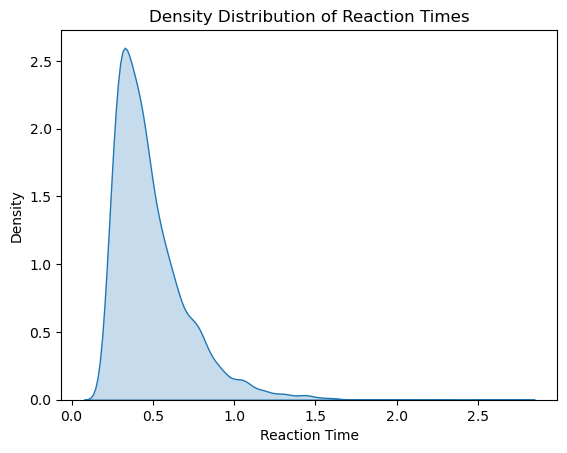

<Figure size 640x480 with 0 Axes>

In [2]:


# Load dataset
df = pd.read_csv('dataset-23.tsv', sep='\t')

# Change categorical variables from 'dog' to 1 and 'cat' to 0 for columns 'R' and 'S' and 'prime'
df['R'] = df['R'].map({'dog': 1, 'cat': 0})
df['S'] = df['S'].map({'dog': 1, 'cat': 0})
df['prime'] = df['prime'].replace({'WOOF': 1, 'MEOW': 0})

print(df.head())

# Plot the density distribution of all reaction times to get an overview
sns.kdeplot(df['rt'], fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times')
plt.show()
plt.savefig('reaction_times.png')

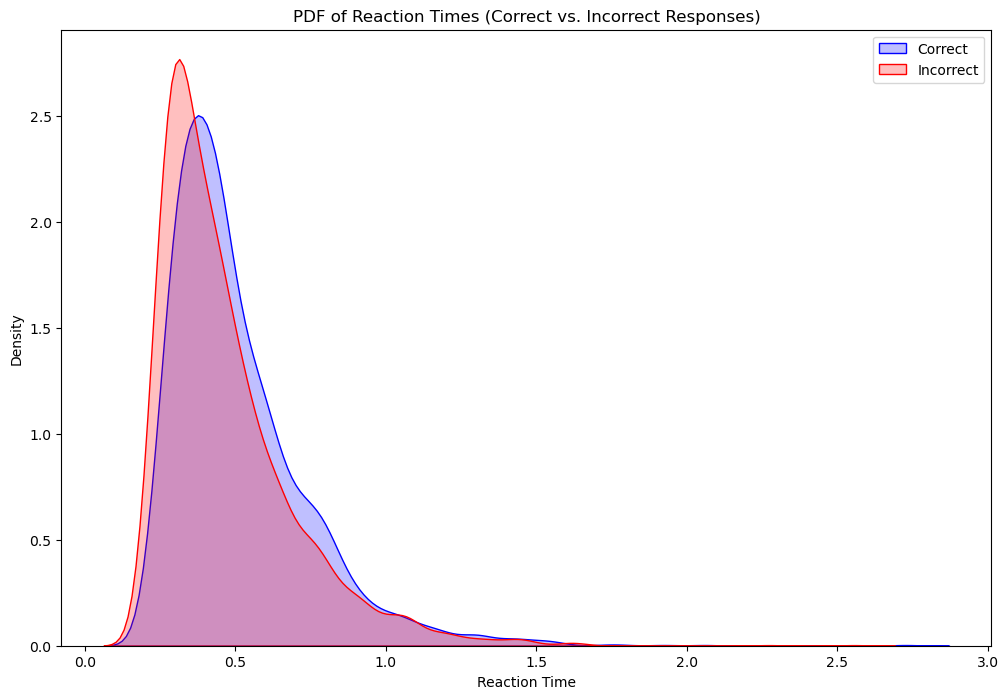

<Figure size 640x480 with 0 Axes>

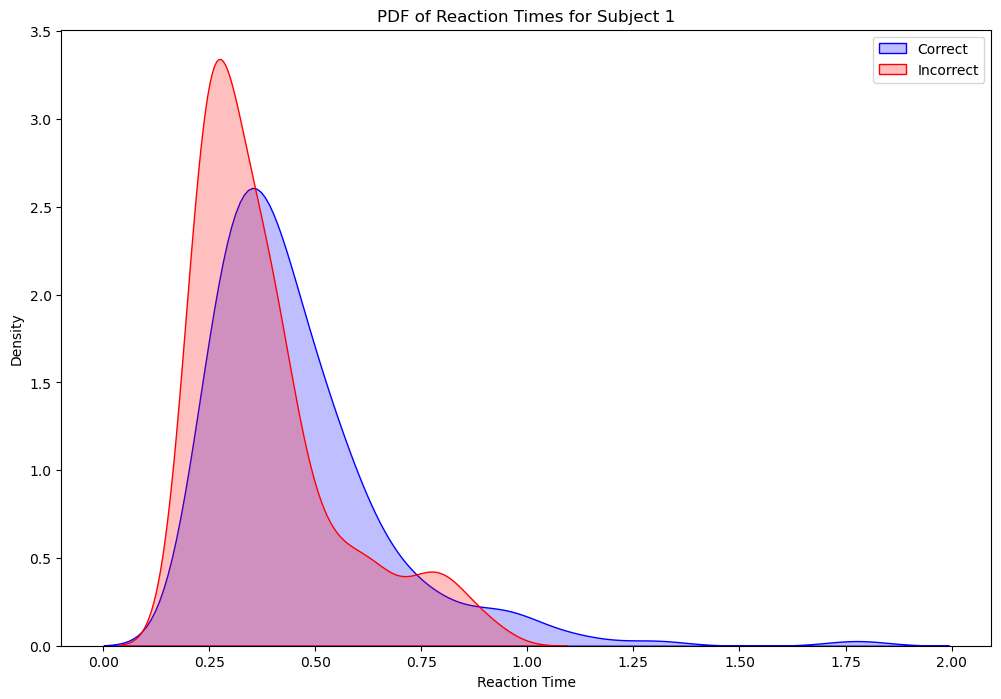

<Figure size 640x480 with 0 Axes>

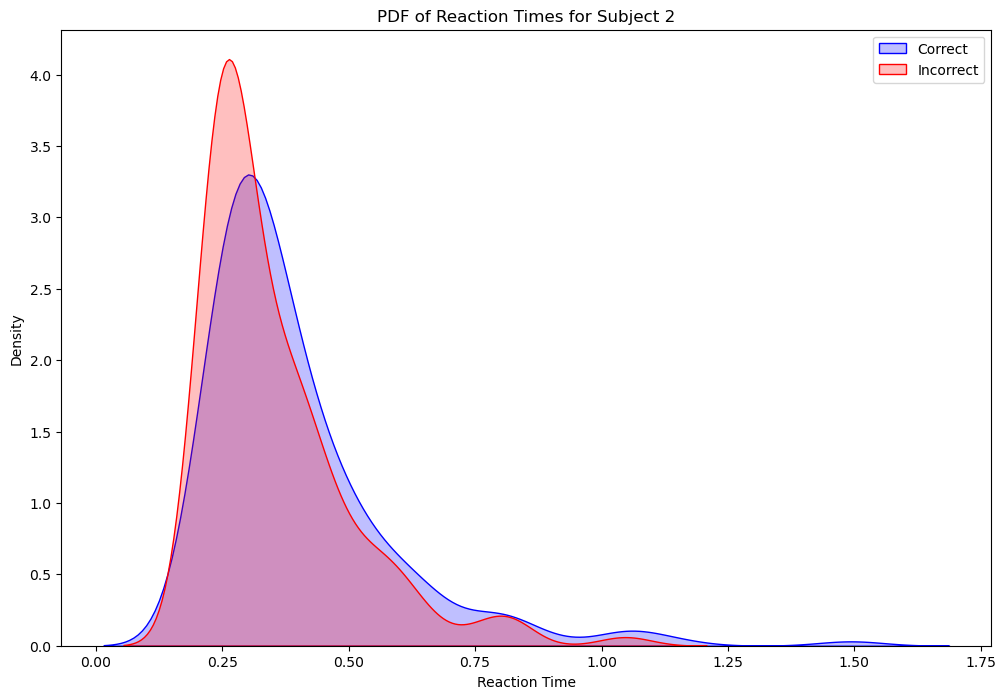

<Figure size 640x480 with 0 Axes>

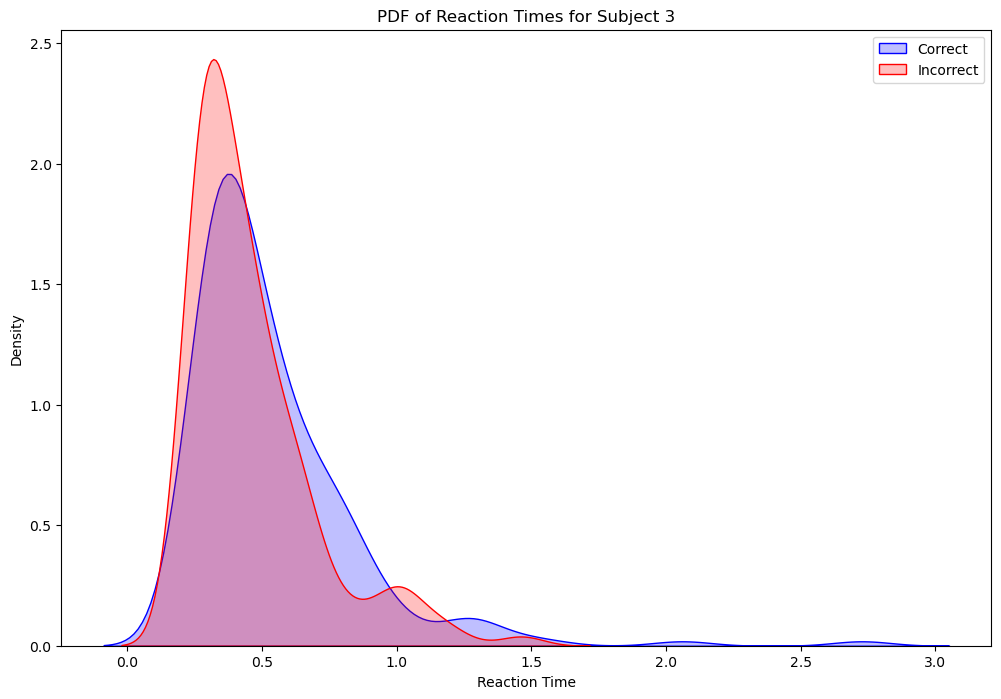

<Figure size 640x480 with 0 Axes>

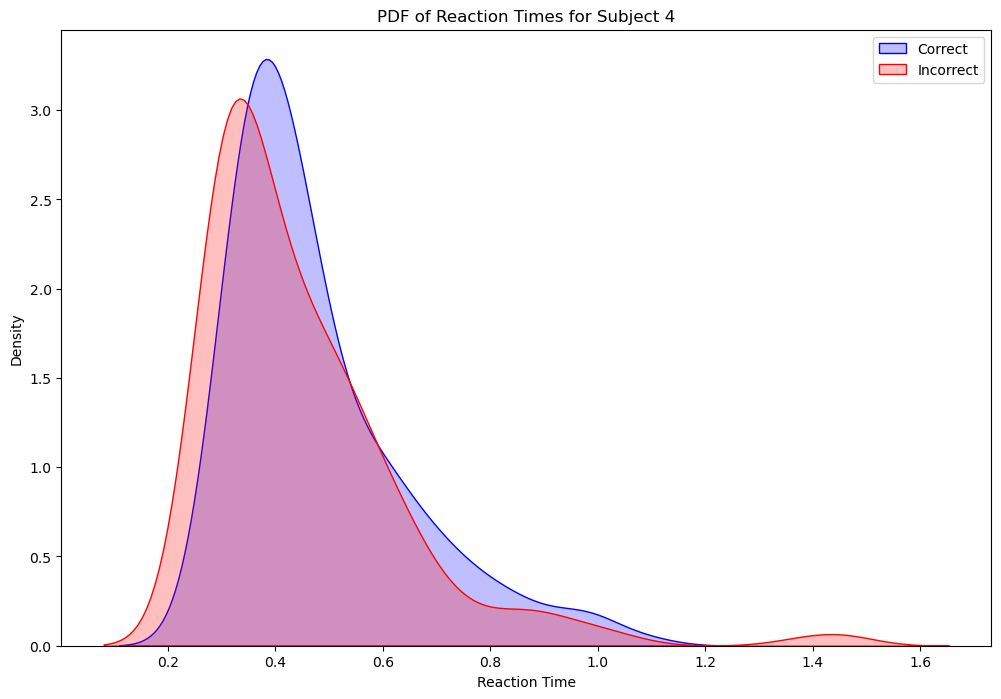

<Figure size 640x480 with 0 Axes>

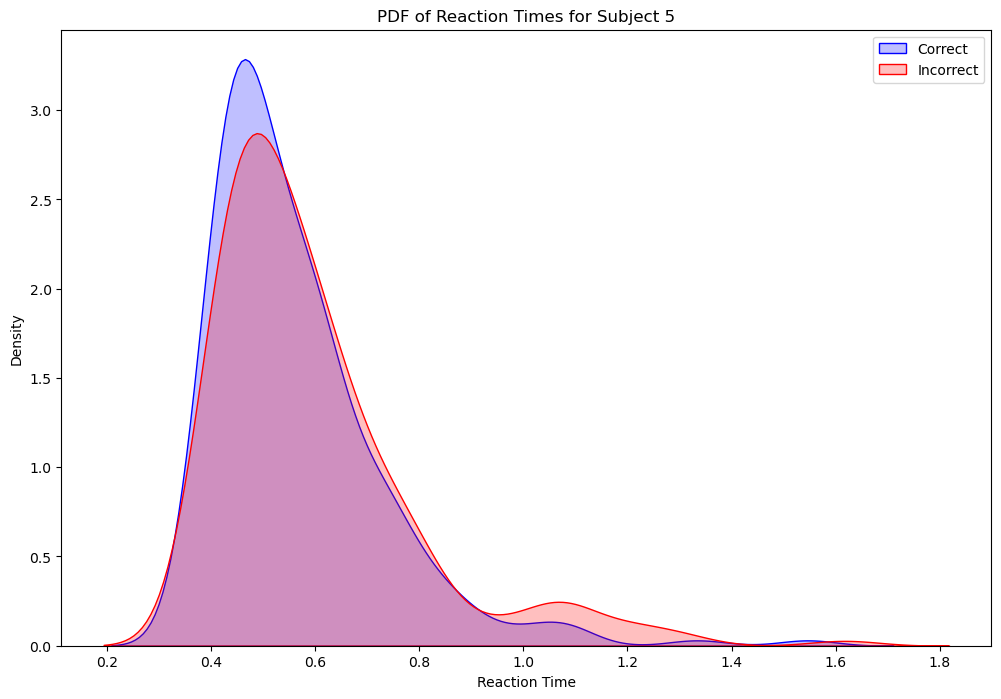

<Figure size 640x480 with 0 Axes>

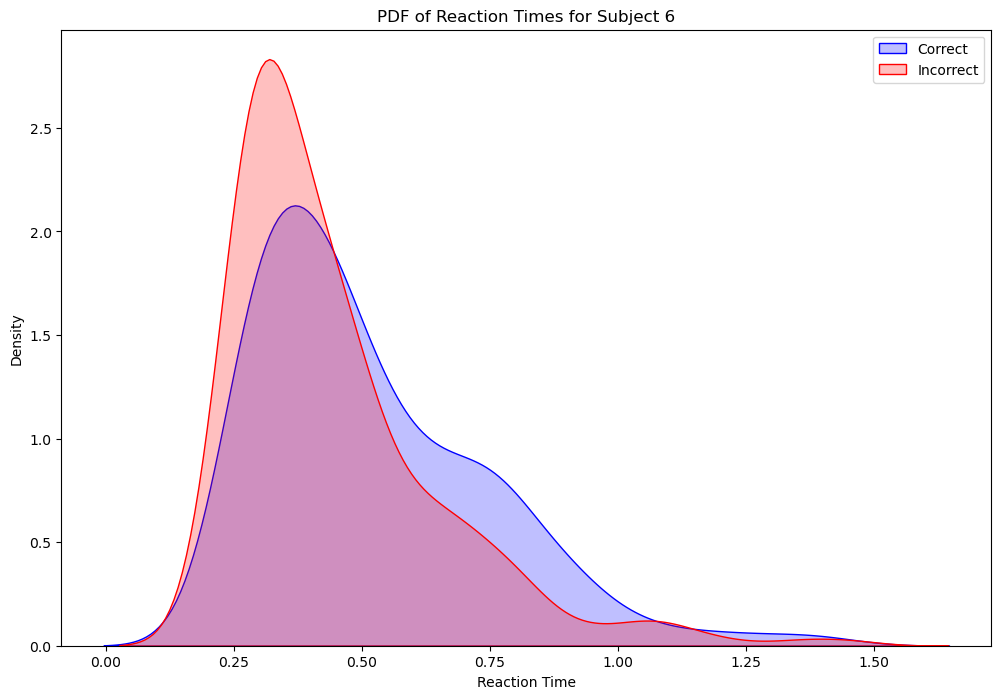

<Figure size 640x480 with 0 Axes>

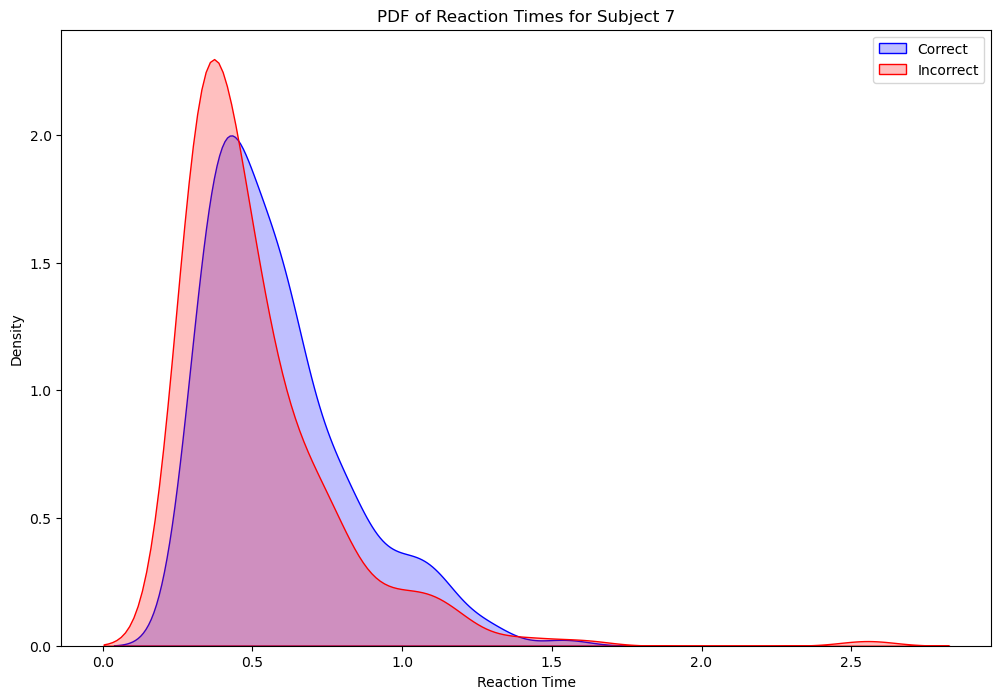

<Figure size 640x480 with 0 Axes>

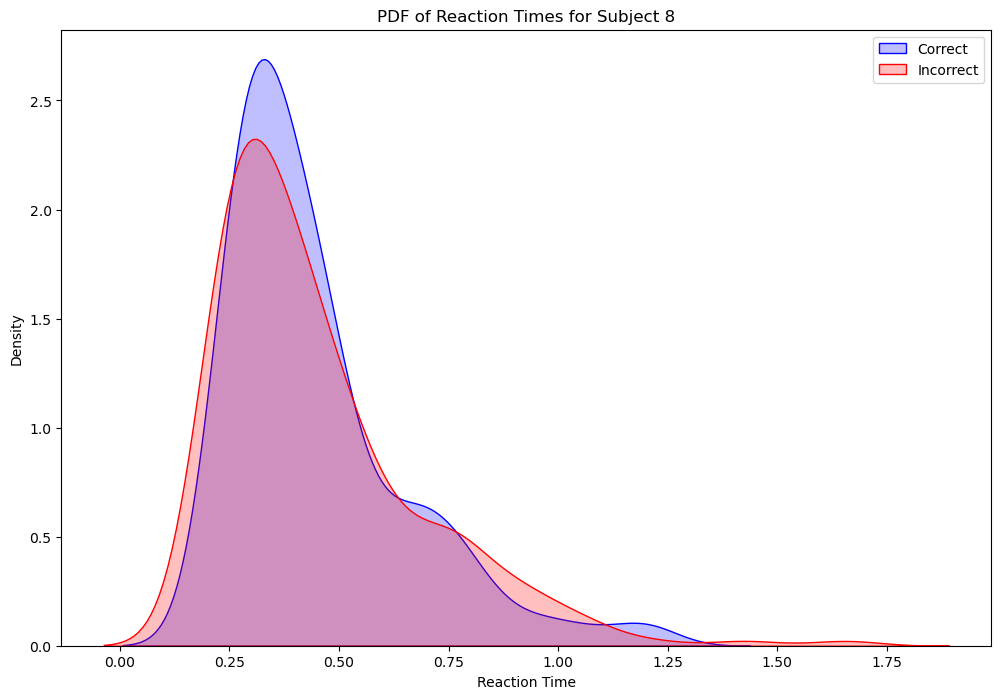

<Figure size 640x480 with 0 Axes>

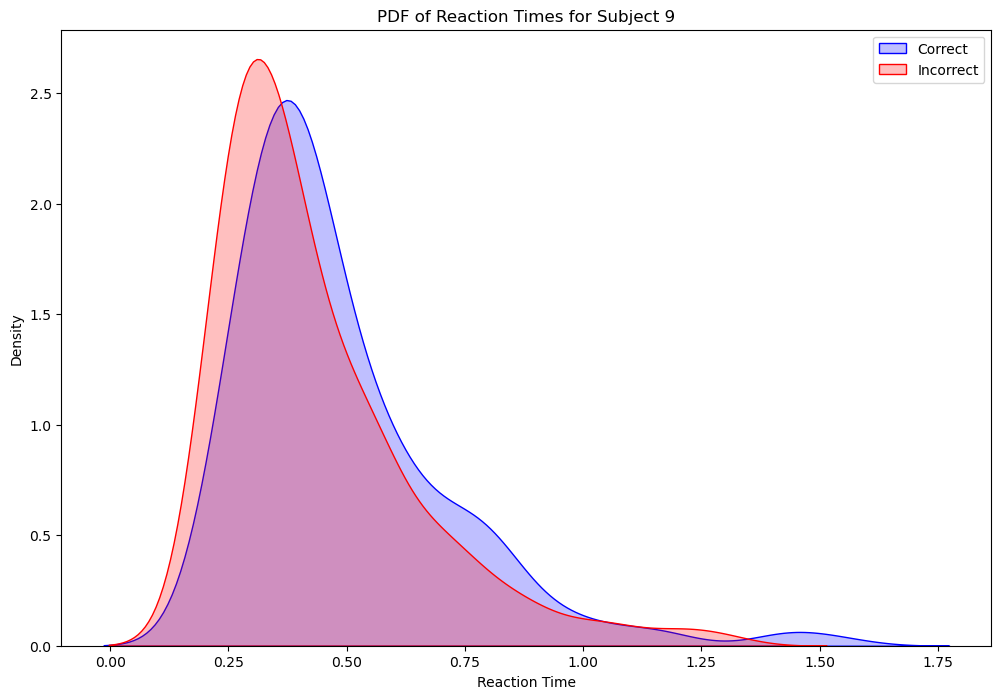

<Figure size 640x480 with 0 Axes>

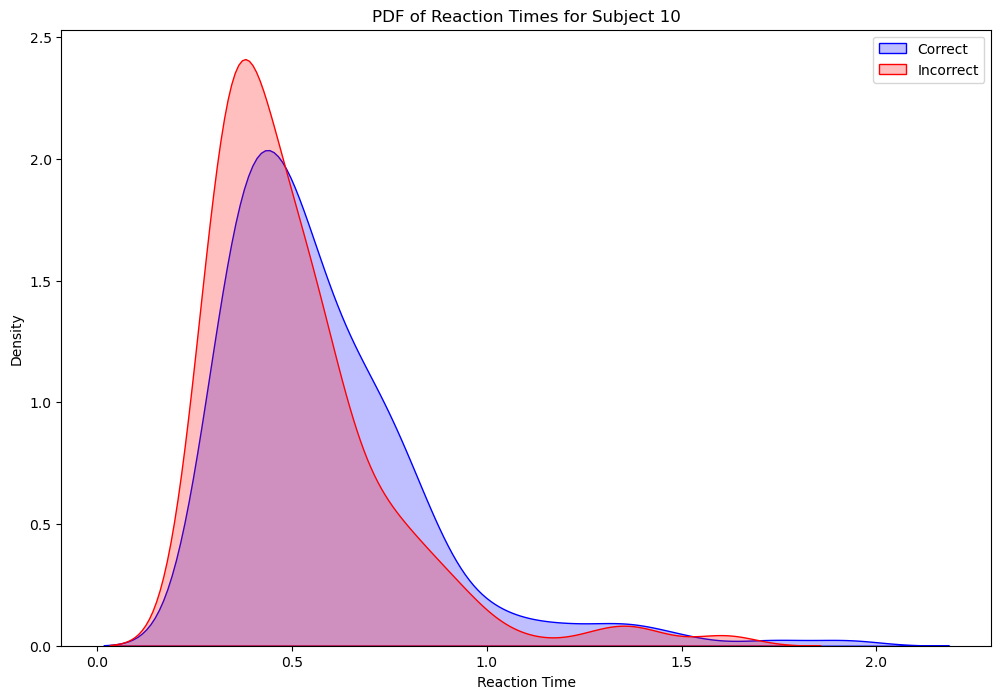

<Figure size 640x480 with 0 Axes>

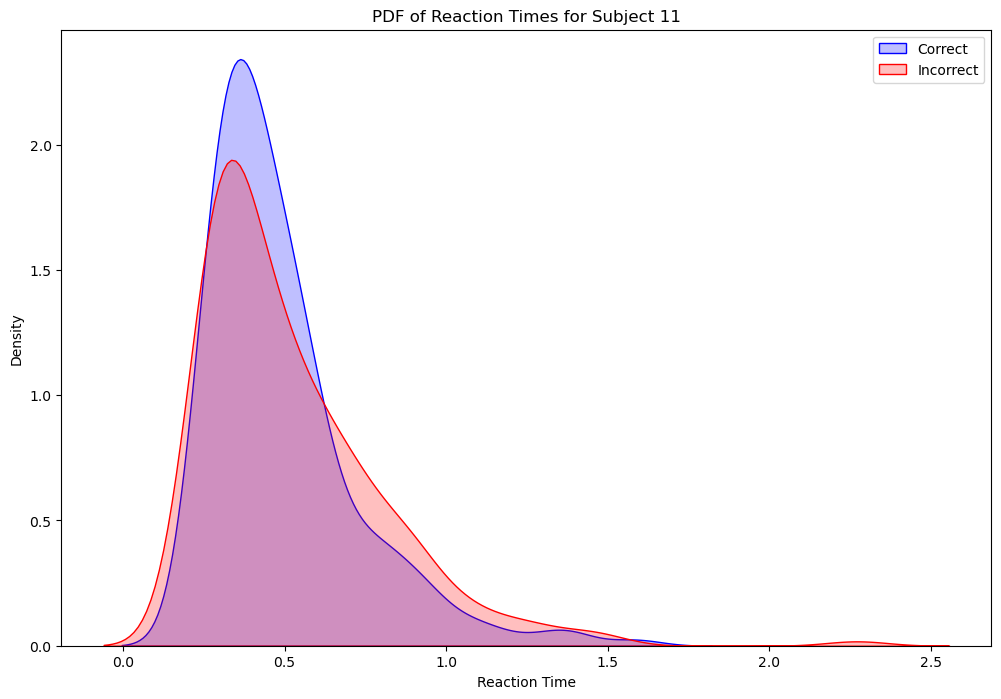

<Figure size 640x480 with 0 Axes>

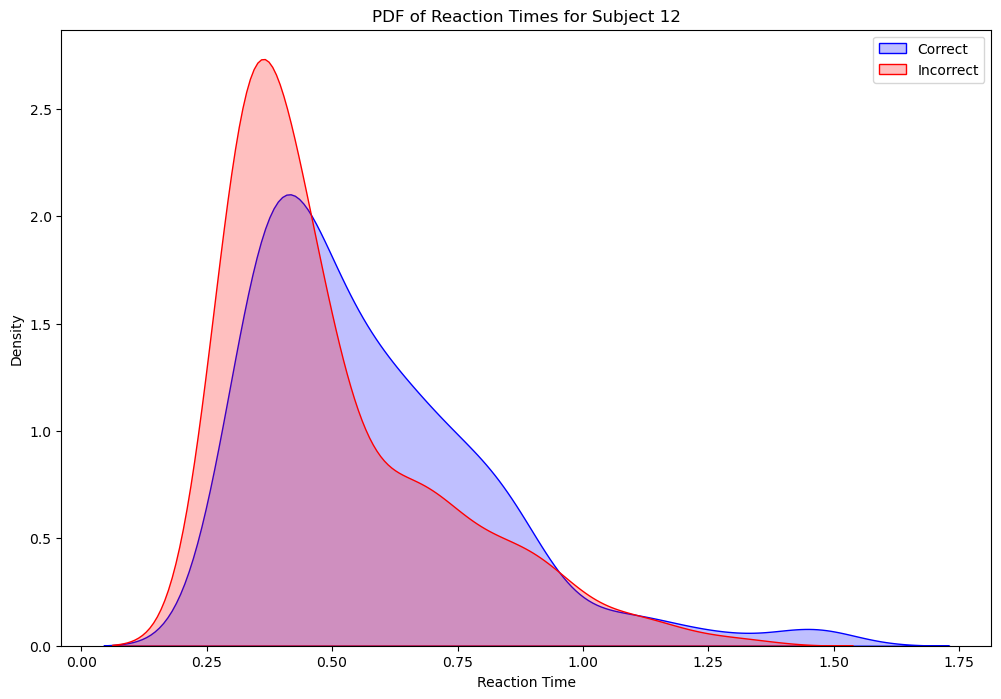

<Figure size 640x480 with 0 Axes>

In [27]:
# Filter for correct responses
correct_responses = df[df['R'] == 1]

# Filter for incorrect responses
incorrect_responses = df[df['R'] == 0]

# PDF of reaction times by subject for all incorrect vs. correct responses
plt.figure(figsize=(12, 8))
sns.kdeplot(data=correct_responses, x='rt', color='blue', fill=True)
sns.kdeplot(data=incorrect_responses, x='rt', color= 'red', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('PDF of Reaction Times (Correct vs. Incorrect Responses)')
plt.legend(['Correct', 'Incorrect'])
plt.show()
plt.savefig('density_distribution_by_subject_correct.png')

# PDF of reaction times by subject for correct vs. incorrect responses
for i in df.subjects.unique():
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=correct_responses[correct_responses["subjects"]==i], x='rt', color='blue', fill=True, label='Correct')
    sns.kdeplot(data=incorrect_responses[incorrect_responses["subjects"]==i], color='red', x='rt', fill=True, label='Incorrect')
    plt.xlabel('Reaction Time')
    plt.ylabel('Density')
    plt.title(f'PDF of Reaction Times for Subject {i}')
    plt.legend()
    plt.show()
    plt.savefig('density_distribution_by_subject_incorrect.png')

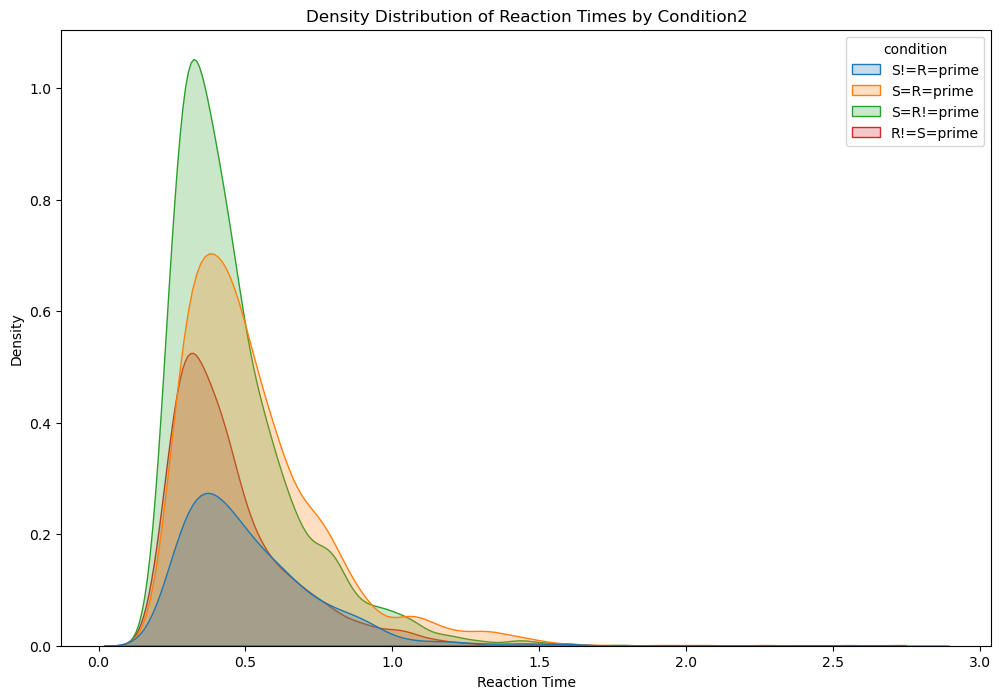

<Figure size 640x480 with 0 Axes>

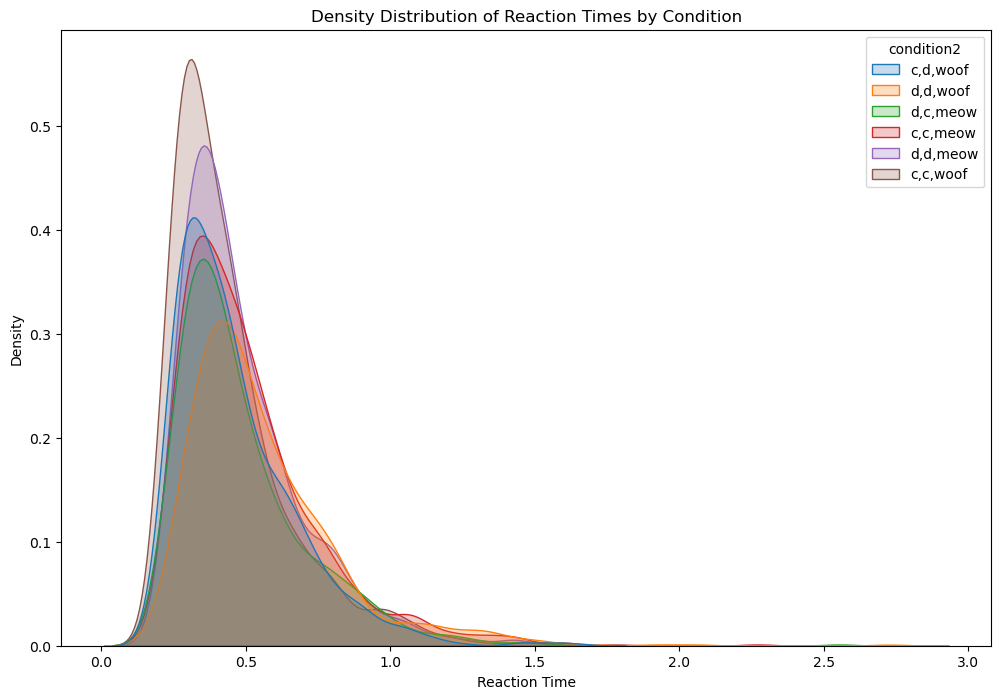

condition
S=R!=prime    2081
S=R=prime     1743
R!=S=prime    1017
S!=R=prime     679
Name: count, dtype: int64
s=cat, prime=MEOW: 1380
s=cat, prime=WOOF: 1380
s=dog, prime=MEOW: 1380
s=dog, prime=WOOF: 1380


<Figure size 640x480 with 0 Axes>

In [30]:
# Create a new column to categorize the conditions under assumption cat=dog
df['condition'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R=prime'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R!=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R!=prime'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'R!=S=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'R!=S=prime'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'S!=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'S!=R=prime'



# Create a new column to categorize the conditions under assumption cat!=dog
df['condition2'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,meow'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,woof'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'd,c,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'c,d,woof'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'c,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'd,c,meow'

# Plot the density distribution of reaction times for each condition2
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition2')
plt.show()
plt.savefig('density_distributiontest.png')


# Plot the density distribution of reaction times for each condition under assumption that cat=dog
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition')
plt.show()
plt.savefig('density_distributioncat=dog.png')
# Calculate the absolute occurrences of each category for 
category_counts = df['condition'].value_counts()
print(category_counts)



# Checking if initial distribution of meow, woof, cat, dog is balanced

# Count the occurrences for each combination of 'S' and 'prime'
s_cat_prime_meow = df[(df['S'] == 0) & (df['prime'] == 0)].shape[0]
s_cat_prime_woof = df[(df['S'] == 0) & (df['prime'] == 1)].shape[0]
s_dog_prime_meow = df[(df['S'] == 1) & (df['prime'] == 0)].shape[0]
s_dog_prime_woof = df[(df['S'] == 1) & (df['prime'] == 1)].shape[0]

print(f"s=cat, prime=MEOW: {s_cat_prime_meow}")
print(f"s=cat, prime=WOOF: {s_cat_prime_woof}")
print(f"s=dog, prime=MEOW: {s_dog_prime_meow}")
print(f"s=dog, prime=WOOF: {s_dog_prime_woof}")
# The distribution is balanced




In [51]:
list = [
    ('c,c,woof', 'd,d,meow'),
    ('c,c,meow', 'd,d,woof'),
    ('d,c,meow', 'c,d,woof'),
    ('c,d,woof', 'd,c,meow')
]

for condition1, condition2 in list:
    # Get the reaction times for the two conditions
    rt_condition1 = df[df['condition2'] == condition1]['rt']
    rt_condition2 = df[df['condition2'] == condition2]['rt']

    # Ensure the arrays have the same length by sampling from the larger array
    min_length = min(len(rt_condition1), len(rt_condition2))
    rt_condition1 = rt_condition1.sample(min_length, random_state=1)
    rt_condition2 = rt_condition2.sample(min_length, random_state=1)

    # Perform the t-test
    t_stat, p_value = ttest_rel(rt_condition1, rt_condition2)

    # Output the results
    print(f"T-test for {condition1} vs {condition2}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print('-------------------------')



T-test for c,c,woof vs d,d,meow
T-statistic: -4.538603151792849
P-value: 6.350796343298829e-06
-------------------------
T-test for c,c,meow vs d,d,woof
T-statistic: -4.150783805453739
P-value: 3.672524977104899e-05
-------------------------
T-test for d,c,meow vs c,d,woof
T-statistic: 2.39441726782721
P-value: 0.016873754655156267
-------------------------
T-test for c,d,woof vs d,c,meow
T-statistic: -2.39441726782721
P-value: 0.016873754655156267
-------------------------


This indicates that the assumption of cat=dog does not hold. 
Answers are biased towards cat.


In [38]:
# Create T-test to check signifance of the difference in reaction times between "S=R!=prime" and "S=R=prime"

t_stat, p_value = ttest_ind(df[df['condition']=='S=R=prime']['rt'], df[df['condition']=='S=R!=prime']['rt'], equal_var=False)  # Use equal_var=False for Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 8.83630314477002
P-value: 1.5490998442114633e-18


# ANALYSIS 
A bit weird that "S=R!=prime" gets the best reaction times, when it should be lower than "S=R=prime". There is probably a significant differenc.


In [52]:

# Create a contingency table with S, R, and prime
#contingency_table = pd.crosstab(index=[df['S'], df['R'],df['prime']], columns=[df['S'], df['R'],df['prime']])

contingency_table1 = pd.crosstab(df['S'], df['R'])
contingency_table2 = pd.crosstab(df['S'], df['prime'])
contingency_table3 = pd.crosstab(df['R'], df['prime']) #shows that there is a bias towards cats, cats been chosen more.
# Separate reaction times for cat and dog


# Calculate the percentage of cat responses per subject
cat_percentage_per_subject = df[df['R'] == 0].groupby('subjects').size() / df.groupby('subjects').size() * 100
# percentage of cat responses per subject
print("percentage of cat responses per subject:")
print(cat_percentage_per_subject)
# Perform t-test
t_stat, p_value = ttest_1samp(cat_percentage_per_subject, 0.4)
print('_________________________')
print("T-test for the percentage of cat responses per subject:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Display the contingency table

contingency_table3


percentage of cat responses per subject:
subjects
1     54.782609
2     56.304348
3     56.304348
4     53.260870
5     47.608696
6     60.434783
7     52.391304
8     51.086957
9     55.869565
10    53.260870
11    51.956522
12    58.043478
dtype: float64
_________________________
T-test for the percentage of cat responses per subject:
T-statistic: 54.5479
P-value: 0.0000


prime,0,1
R,,
0,1329,1667
1,1431,1093


Yet again, probably significant difference. 

In [53]:
# Cleanse data

# Check for missing entries in the dataframe
missing_entries = df.isnull().sum()
# print("Missing entries in each column:")
# print(missing_entries)
#no missing entries

# Check for duplicate entries in the dataframe  
duplicate_entries = df.duplicated().sum()
#print("Number of duplicate entries in the dataframe:", duplicate_entries)
#no duplicate entries

# Check for outliers in the dataframe
outliers = df[(df['rt'] < 0.2) | (df['rt'] > 2.0)]
print("Number of outliers in the dataframe:", outliers.shape[0])
print(outliers)

# Remove outliers from the dataframe
df= df[~df.index.isin(outliers.index)]
print("Number of entries after removing outliers:", df.shape[0])
#removed 6 outliers, should be fine as it is less than 1% of the data

df.head()


Number of outliers in the dataframe: 6
      subjects  S  prime  R        rt   condition condition2
3351         3  1      1  1  2.726970   S=R=prime   d,d,woof
5511         3  1      1  1  2.060569   S=R=prime   d,d,woof
3331         7  1      0  0  2.555356  S!=R=prime   d,c,meow
2444         8  1      1  0  0.199197  R!=S=prime   c,d,woof
3020         8  1      1  0  0.199295  R!=S=prime   c,d,woof
1883        11  0      0  0  2.272151   S=R=prime   c,c,meow
Number of entries after removing outliers: 5514


,subjects,S,prime,R,rt,condition,condition2
361,1,0,1,1,0.369526,S!=R=prime,"c,d,woof"
2617,1,0,1,1,0.695785,S!=R=prime,"c,d,woof"
3013,1,1,1,1,0.749988,S=R=prime,"d,d,woof"
1117,1,1,0,0,0.372379,S!=R=prime,"d,c,meow"
2257,1,0,0,0,0.351478,S=R=prime,"c,c,meow"


In [54]:
# Prepare data for pyddm
sample = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="R")


In [61]:

# hypothesis 1: Drift depends on prime
class DriftCondition(Drift):
    name = "Drift depends on prime condition"
    required_parameters = ['v_meow', 'v_woof']  # Parameters to fit
    required_conditions = ['prime']    # Experimental conditions

    def get_drift(self,x,t, conditions, **kwargs):
        if conditions['prime'] == 0:  # MEOW
            return self.v_meow
        else:  # WOOF
            return self.v_woof



# hypothesis 2: Bound depends on prime
class BoundCondition(Bound):
    name = "Boundary depends on prime condition"
    required_parameters = ['a_meow', 'a_woof']
    required_conditions = ['prime']

    def get_bound(self, x, t, conditions, **kwargs):
        if conditions['prime'] == 0:  # MEOW
            return self.a_meow
        else:  # WOOF
            return self.a_woof



# hypothesis 3: Starting point depends on prime

class ICCondition(InitialCondition):
    name = "Starting point depends on prime condition"
    required_parameters = ['z_meow', 'z_woof']
    required_conditions = ['prime']

    def get_IC(self, x, dx, conditions, **kwargs):
        # Determine the starting point based on the condition code
        if conditions['prime'] == 0:  # MEOW
            z = self.z_meow
        else:  # WOOF
            z = self.z_woof
        ic_array = np.zeros_like(x)
        idx = np.argmin(np.abs(x - z))
        ic_array[idx] = 1 / dx  # normalize so sum= 1
        
        return ic_array


In [ ]:
# H1: Create a model with drift varying by condition
model_v = Model(name='DDM with drift varying by condition',
                drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                     v_woof=Fittable(minval=-3, maxval=3)),
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=4.0)),
                bound=BoundConstant(B=1.0),      
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                IC=ICPointSourceCenter())
fit_model_v = pyddm.fit_adjust_model(model=model_v, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_v, sample=sample)


# H2: Create a model with boundary varying by condition
model_a = Model(name='DDM with boundary varying by condition',
                drift=DriftConstant(drift=1.0),   
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                bound=BoundCondition(a_meow=Fittable(minval=0.5, maxval=3.0),
                                    a_woof=Fittable(minval=0.5, maxval=3.0)),
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                IC=ICPointSourceCenter())

fit_model_a = pyddm.fit_adjust_model(model=model_a, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_a, sample=sample)


# H3: Create a model with starting point varying by condition
model_z = Model(name='DDM with starting point varying by condition',
                drift=DriftConstant(drift=1.0),
                noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                bound=BoundConstant(B=1.0),
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)), 
                IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
                               z_woof=Fittable(minval=-0.5, maxval=0.5)))

fit_model_z = pyddm.fit_adjust_model(model=model_z, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_z, sample=sample)




Info: Params [ 0.12283836 -0.70680365  1.80972607  0.18516543] gave 1960.9691162336098


Output()

Info: Params [3.         1.69194275 1.60846431 0.1855123 ] gave 2191.038991815545


Output()

Info: Params [ 1.82891403 -0.10453751 -0.31611509  0.19942597] gave 1916.2039270534985


Output()

In [ ]:
#Full model, only works for either drift or bound, not both
model_full_wo_IC = Model(name='Full DDM with all parameters varying',
                   drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                        v_woof=Fittable(minval=-3, maxval=3)),
                   noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                   bound=BoundCondition(a_meow=Fittable(minval=0.1, maxval=3.0),
                                        a_woof=Fittable(minval=0.1, maxval=3.0)),
                   overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                   IC=ICPointSourceCenter())
                   

model_full_wo_BO = Model(name='Full DDM with all parameters varying',
                   drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
                                        v_woof=Fittable(minval=-3, maxval=3)),
                   noise=NoiseConstant(noise=Fittable(minval=0.5, maxval=3.0)),
                   bound=BoundConstant(B=1.0),
                   overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
                   IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
                                  z_woof=Fittable(minval=-0.5, maxval=0.5)))

# Note that it is not possible to fit the full model with both bound and bias (IC) varying by condition, dependency issue or so

fit_model_full_wo_IC = pyddm.fit_adjust_model(model=model_full_wo_IC, sample=sample,  lossfunction=pyddm.LossRobustLikelihood, verbose=False)
fit_model_full_wo_BO = pyddm.fit_adjust_model(model=model_full_wo_BO, sample=sample,  lossfunction=pyddm.LossRobustLikelihood, verbose=False)
model_gui_jupyter(model=model_full_wo_IC, sample=sample)
model_gui_jupyter(model=model_full_wo_BO, sample=sample)

Info: Params [ 0.18632287 -1.03192264  2.69192073  1.51687921  1.46000639  0.18573596] gave 1954.2391980774553
Info: Params [ 0.06402262  0.13148991  1.83133265  0.01543488 -0.24677847  0.1971144 ] gave 1794.8606763593066


Output()

Output()

In [ ]:
# Display parameters and model fitting results
pyddm.display_model(fit_model_full_wo_IC)
pyddm.display_model(fit_model_full_wo_BO)

Model Full DDM with all parameters varying information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftCondition:
    Drift depends on prime condition
    Fitted parameters:
    - v_meow: 0.186323
    - v_woof: -1.031923
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 2.691921
Bound component BoundCondition:
    Boundary depends on prime condition
    Fitted parameters:
    - a_meow: 1.516879
    - a_woof: 1.460006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.185736
Fit information:
    Loss function: Negative log likelihood
    Loss function value: 1954.2391980774553
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 6
        - samplesize: 5514
        - mess: ''

Model Full DDM with all parameters varying i

In [ ]:
def compute_aic(fit_result, num_params):
    likelihood = -fit_result.fitresult.value()
    aic = 2 * num_params - 2 * likelihood
    return aic

# Number of parameters in each model
num_params_v = 2  # v_meow, v_woof
num_params_a = 2  # a_meow, a_woof
num_params_z = 2  # z_meow, z_woof
num_params_full = 4  # v_meow, v_woof,z_meow, z_woof

aic_v = compute_aic(fit_model_v, num_params_v)
aic_a = compute_aic(fit_model_a, num_params_a)
aic_z = compute_aic(fit_model_z, num_params_z)
aic_full_wo_IC = compute_aic(fit_model_full_wo_IC, num_params_full)
aic_full_wo_BO = compute_aic(fit_model_full_wo_BO, num_params_full)

print(f"AIC for model_v: {aic_v:.2f}")
print(f"AIC for model_a: {aic_a:.2f}")
print(f"AIC for model_z: {aic_z:.2f}")
print(f"AIC for model_full with IC static: {aic_full_wo_IC:.2f}")
print(f"AIC for model_full with Boundaries static: {aic_full_wo_BO:.2f}")



def compute_bic(fit_result, num_params, num_data_points):
    # Compute log-likelihood
    likelihood = -fit_result.fitresult.value()
    # Compute BIC
    bic = num_params * np.log(num_data_points) - 2 * likelihood
    return bic

# Number of data points in your sample
num_data_points = len(sample)

# Compute BIC for each model
bic_v = compute_bic(fit_model_v, num_params_v, num_data_points)
bic_a = compute_bic(fit_model_a, num_params_a, num_data_points)
bic_z = compute_bic(fit_model_z, num_params_z, num_data_points)
bic_full_wo_IC = compute_bic(fit_model_full_wo_IC, num_params_full, num_data_points)
bic_full_wo_BO = compute_bic(fit_model_full_wo_BO, num_params_full, num_data_points)

print(f"BIC for model_v: {bic_v:.2f}")
print(f"BIC for model_a: {bic_a:.2f}")
print(f"BIC for model_z: {bic_z:.2f}")
print(f"BIC for model_full with IC static: {bic_full_wo_IC:.2f}")
print(f"BIC for model_full with Boundaries static: {bic_full_wo_BO:.2f}")



AIC for model_v: 3925.94
AIC for model_a: 4386.08
AIC for model_z: 3836.41
AIC for model_full with IC static: 3916.48
AIC for model_full with Boundaries static: 3597.72
BIC for model_v: 3939.17
BIC for model_a: 4399.31
BIC for model_z: 3849.64
BIC for model_full with IC static: 3942.94
BIC for model_full with Boundaries static: 3624.18


In [62]:
# Generate simulated data from the model
# how to simulate data from the model

# Simulate trials for MEOW condition
#simulated_data_meow = fit_model_v.simulate_trial(conditions={'prime': 0})
if not fit_model_v.conditions:
    print("Model is not fitted. Fit the model before running simulate.")
else: 
    print("should be fitted")
simulated_data_meow = fit_model_v.simulate(ntrials=1000, conditions={'prime': 0})

# Convert the simulated data into a Pandas DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Display the first few rows of the DataFrame
print(simulated_df.head())


print(len(simulated_data_meow))
print(simulated_data_meow)
for i, entry in enumerate(simulated_data_meow):
    print(f"Entry {i}: {entry:.2f}")
# rt_meow = simulated_data_meow['rt']
# choice_meow = simulated_data_meow['R'].astype(bool)

# # Simulate trials for WOOF condition
# simulated_data_woof = fit_model_v.simulate_trial(conditions={'prime': 1})
# rt_woof = simulated_data_woof['rt']
# choice_woof = simulated_data_woof['R'].astype(bool)

# # Plot RT distributions
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.hist(rt_meow[choice_meow], bins=50, alpha=0.5, label='Correct', color='green')
# plt.hist(rt_meow[~choice_meow], bins=50, alpha=0.5, label='Incorrect', color='red')
# plt.title('Simulated RTs for MEOW')
# plt.xlabel('Response Time (s)')
# plt.ylabel('Frequency')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.hist(rt_woof[choice_woof], bins=50, alpha=0.5, label='Correct', color='green')
# plt.hist(rt_woof[~choice_woof], bins=50, alpha=0.5, label='Incorrect', color='red')
# plt.title('Simulated RTs for WOOF')
# plt.xlabel('Response Time (s)')
# plt.ylabel('Frequency')
# plt.legend()

# plt.tight_layout()
# plt.show()



AttributeError: 'Model' object has no attribute 'conditions'

In [50]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
log_likelihoods = {"v": [], "a": [], "z": []}


# Compute log-likelihoods by comparing observed RTs and choices
def compute_log_likelihood(observed, simulated):
    observed_choices = observed.choice
    observed_rts = observed.rt

    # Match RTs and choices for likelihood estimation
    likelihoods = [
        np.mean((simulated.rt == observed_rts[i]) & (simulated.choice == observed_choices[i]))
        for i in range(len(observed))
    ]
    return np.sum(np.log(np.clip(likelihoods, 1e-10, 1)))  # Avoid log(0)
    
class CustomLossLikelihood(LossFunction):
    def loss(self, sample, model):
        # Negative log-likelihood
        return -np.sum(np.log(model.probability_of(sample)))
# Convert sample to a pandas DataFrame
df_sample = sample.to_pandas_dataframe(rt_column_name="rt", correct_column_name="R")

for train_idx, test_idx in kf.split(df_sample):
    train_sample = Sample.from_pandas_dataframe(df_sample.iloc[train_idx], rt_column_name="rt", choice_column_name="choice")
    test_sample = Sample.from_pandas_dataframe(df_sample.iloc[test_idx], rt_column_name="rt", choice_column_name="choice")

    # Fit models on training data
    fit_v = pyddm.fit_adjust_model(model=model_v, sample=train_sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
    #fit_z = pyddm.fit_adjust_model(model=model_z, sample=train_sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
    
    

#     # Simulate data using the fitted model
    #simulated_v = [fit_v.simulate_trial(conditions={'prime': row['prime']}) for _, row in df_sample.iloc[test_idx].iterrows()]
    simulated_v = fit_v.simulate(n=len(test_idx), conditions={'prime': 0})
    #simulated_z = [fit_z.simulate_trial(conditions={'prime': row['prime']}) for _, row in df_sample.iloc[test_idx].iterrows()]



#     ll_v = compute_log_likelihood(test_sample, simulated_v)
#     ll_z = compute_log_likelihood(test_sample, simulated_z)
    
#     log_likelihoods["v"].append(ll_v)
#     log_likelihoods["z"].append(ll_z)

# # Compute average log-likelihoods


# print("Average Log-Likelihoods:")
# for model, ll in log_likelihoods.items():
#     print(f"{model}: {sum(ll) / len(ll)}")

# Example for model_v
df_sample = sample.to_pandas_dataframe(rt_column_name="rt", correct_column_name="R")
plt.hist(df_sample['rt'], bins=100, alpha=0.5, label="Observed", density=True)
# Convert the list of simulated trials to a DataFrame
simulated_v_df = pd.DataFrame([{'rt': trial[0], 'choice': trial[1]} for trial in simulated_v])
plt.hist(simulated_v_df['rt'], bins=50, alpha=0.5, label="Simulated", density=True)
plt.legend()
plt.title("RT Distribution Comparison: Model v")
plt.show()  


Info: Params [-0.83806511 -1.49440535  1.75616942  0.18338334] gave 1331.3516692727346


AttributeError: 'Model' object has no attribute 'simulate'

# RESULTS 
It can be observed that model 1 and 3 are performing best. 
Maybe mix of both because, 3600/3626 is pretty good. 
But cannot really be interpreted clearly. rather-> trade-off between simple model vs complex model and better performance. 
More experiments required, I guess. 

Is there a way to find out @lecturer?

2 does not really make sense, because the noise is at max and continues growing to max, whereas the noise is at 1.9/1.8 for the other models, 

# Improvements

Use bound=pyddm.BoundCollapsingExponential(B=1, tau=pyddm.Fittable(minval=.01, maxval=3))) to make things more accurate.


1) is there a better way to determine which model is more realistic?

2) Do the implementations of the model make sense given the hypothesis?

3) Important to note that the dataset is biased towards cats. how should that be displayed? z is pushed towards cat anyway?


4) does the ddm look like || cat dog, or || correct wrong for dog\cat.

5)  How was the dataset recorded, more info?

6) How to know if it is only drift or only z (starting point, bias) or a mix?

7) what should be in the report? also about dataset?

8) is there a difference between asymmetric threshold change and starting point change (bias)?










So, probably a bit of both, but fosho  z. 

If the experimental design manipulates decision bias (e.g., via reward or base rates), expect 
z
z to vary.
If the manipulation affects stimulus clarity, expect 
v
v to vary.

//


Drift Rate (
v
v): Does the task or experimental manipulation likely influence evidence accumulation speed? For instance, varying stimulus quality might be best captured by changes in 
v
v.
Starting Point (
z
z): Does the context or prior expectation suggest a bias toward one decision over another? This might be reflected in 
z
z.
Combination (
v
v and 
z
z): Are there reasons to believe both processes are at play? For example, in tasks with both stimulus difficulty and prior expectations, a model allowing both parameters to vary may better capture the process.